In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [2]:
# GPU 사용 여부 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 머신러닝/딥러닝 : 데이터의 법칙성을 추출
    - 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, 얼굴식별, etc...
    
    - 지도학습(회귀, 분류) vs 비지도학습(군집) vs 강화학습(게임)
    
- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류....)
- 3. 모델 구성
- 4. 모델 학습 과정 설정(손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential  # 모델 생성
from tensorflow.keras.layers import Dense, Input # 모델에 레이어 추가시 

In [4]:
# 학습데이터 == 훈련데이터
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])

In [13]:
# 분류분석을 위한 인코딩 종류
data = np.array(['a','b','b','b','c'])
print('1. 원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('2. 라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('3. 원핫인코딩된 데이터(keras) :\n', one_hot_encoding_data)

1. 원 데이터 : ['a' 'b' 'b' 'b' 'c']
2. 라벨인코딩된 데이터 : [0 1 1 1 2]
3. 원핫인코딩된 데이터(keras) :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [23]:
# 분류분석을 위한 원핫인코딩 방법
data = np.array([1,2,2,5,9])
print('원 데이터 : ', data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원 핫 인코딩(넘파이배열)\n', categorical_one_hot)
import pandas as pd
display('get_dummies를 이용한 원핫인코딩(데이터프레임)\n', pd.get_dummies(data))

원 데이터 :  [1 2 2 5 9]
to_categorical을 이용한 원 핫 인코딩(넘파이배열)
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


'get_dummies를 이용한 원핫인코딩(데이터프레임)\n'

,1,2,5,9
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [27]:
Y_train[:2], Y_val[:2]

(array([2, 4]), array([2, 4]))

In [28]:
# 분류분석을 위해 종속변수(target변수)를 원핫인코딩
Y_train = to_categorical(Y_train, 19)
Y_val   = to_categorical(Y_val)

In [29]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [32]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

In [33]:
X_train[:2]

array([1, 2])

In [34]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

# 3. 모델 구성

In [35]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=38, activation='sigmoid')) # units:출력수, activation(활성화함수)
model.add(Dense(units=64, activation="elu"))
model.add(Dense(units=32, activation="elu"))
model.add(Dense(units=19, activation='softmax'))
# activation='softmax' : 모든 출력의 합이 1. 분류분석의 마지막 layer에서 activation함수로 사용
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정
- 손실함수, 옵티마이저, 평가지표
    * loss='categorical_crossentropy' : 딥러닝 훈련시 다중분류분석에서의 손실함수
            - 모델의 예측 확률분포와 실제값의 확률 분포가 얼마나 다른지 계산
    * metrics=['accuracy'] : 정확도

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [37]:
hist = model.fit(X_train, Y_train, # 훈련(학습)데이터
                epochs=300, # 학습횟수
                batch_size=10, # 가중치를 조정하는 단위
                verbose=2, # 0:출력없음. 1:진행상황만출력, 2:에포크별 로그메세지 출력
                validation_data=(X_val, Y_val) # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.9033 - accuracy: 0.0667 - val_loss: 2.6625 - val_accuracy: 0.1111 - 1s/epoch - 164ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5652 - accuracy: 0.1333 - val_loss: 2.4519 - val_accuracy: 0.2222 - 49ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4000 - accuracy: 0.1889 - val_loss: 2.3178 - val_accuracy: 0.3333 - 50ms/epoch - 6ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2953 - accuracy: 0.1667 - val_loss: 2.2194 - val_accuracy: 0.2222 - 49ms/epoch - 5ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1979 - accuracy: 0.1333 - val_loss: 2.1412 - val_accuracy: 0.1111 - 45ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1224 - accuracy: 0.1333 - val_loss: 2.0757 - val_accuracy: 0.2222 - 46ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0695 - accuracy: 0.2667 - val_loss: 2.0216 - val_accuracy: 0.2222 - 47ms/epoch - 5ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0143 - accuracy: 0.2333 - val_loss: 1.9647 - val_accuracy: 0.2222 - 46ms/epoch - 5ms/step
Epoch 9/300
9/9 - 0s - loss: 1.9

Epoch 69/300
9/9 - 0s - loss: 0.4595 - accuracy: 1.0000 - val_loss: 0.4315 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 70/300
9/9 - 0s - loss: 0.4363 - accuracy: 1.0000 - val_loss: 0.4206 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 0.4306 - accuracy: 1.0000 - val_loss: 0.4048 - val_accuracy: 1.0000 - 51ms/epoch - 6ms/step
Epoch 72/300
9/9 - 0s - loss: 0.4120 - accuracy: 1.0000 - val_loss: 0.3971 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3963 - accuracy: 1.0000 - val_loss: 0.3817 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3928 - accuracy: 1.0000 - val_loss: 0.3706 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3933 - accuracy: 1.0000 - val_loss: 0.3664 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3742 - accuracy: 1.0000 - val_loss: 0.3662 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0501 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 1.0000 - 47ms/epoch - 5ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000 - 50ms/epoch - 6ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 278/300
9/

# 6. 모델과정 평가하기
- 학습과정 중 loss와 평가지표(accuracy)살펴보기, evalate함수)

In [38]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

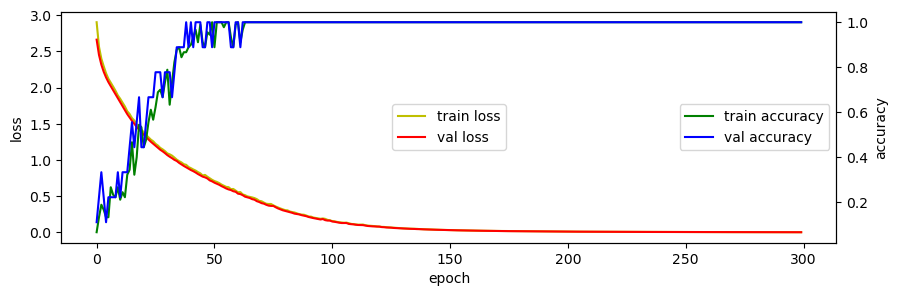

In [59]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,3))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label= 'val loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [62]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=3)

3/3 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000


In [63]:
score

[0.0030445405282080173, 1.0]

In [65]:
print('평가된 loss값 :', score[0])
print('평가된 accuracy :', score[1]*100,'%')

평가된 loss값 : 0.0030445405282080173
평가된 accuracy : 100.0 %


# 7. 모델 사용하기(모델을 사용해서 예측하기)

In [66]:
H = model.predict(np.array([4]))
H

1/1 [==============================] - 0s 82ms/step


array([[1.5214900e-20, 1.4777252e-20, 1.5757653e-17, 2.5562956e-17,
        6.4197742e-10, 2.5926472e-28, 1.3453648e-03, 1.6166401e-23,
        9.9686509e-01, 6.3457972e-16, 1.7894176e-03, 9.6147880e-21,
        9.1174073e-08, 2.7837101e-22, 7.9646836e-12, 9.4294132e-25,
        2.5764799e-19, 3.3632818e-22, 0.0000000e+00]], dtype=float32)

In [67]:
model.predict(np.array([4])).argmax()

1/1 [==============================] - 0s 19ms/step


8

In [69]:
# 몇%의 확률로 분류되었는지 
H[0, H.argmax()]

0.9968651

# 7. 모델 저장하기

In [70]:
model.save('model/2_deep_begin.h5')

# 저장된 모델 사용하기

In [5]:
from tensorflow.keras.models import load_model
import numpy as np
model2 = load_model('model/2_deep_begin.h5')

In [7]:
H = model2.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 33ms/step


4

In [8]:
# 몇%의 확률로 분류되었는지 
H[0, H.argmax()]

0.99767274

In [14]:
[round(val, 3) for val in H[0, [2,4,6]] ]

[0.001, 0.998, 0.001]